Importing useful librairies and setting plot parameters

In [8]:
import pandas as pd
import numpy as np

import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from statistics import mean

import ta
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
plt.rcParams['axes.edgecolor'] = "black"


Loading csv data from a defined date

In [55]:
def load_data(startDate):
    df = pd.read_csv("ETH-PERP.csv")
    df = df.set_index(df['date'])
    df.index = pd.to_datetime(df.index, unit='ms')
    del df['date']
    df = df.loc[startDate:]
    return df


data = load_data('06-01-2022')


Loading useful indicators

In [57]:
def load_indicators(df):

    # Average Directional Movement Index
    df['ADX'] = ta.trend.ADXIndicator(
        df['high'], df['low'], df['close'], window=14).adx()

    # Average True Range
    df['ATR'] = ta.volatility.AverageTrueRange(
        df['high'], df['low'], df['close'], window=14).average_true_range()

    # Relative Strength Index
    df['RSI'] = ta.momentum.RSIIndicator(close=df['close'], window=14).rsi()

    # Simple Moving Average
    df['SMA20'] = ta.trend.sma_indicator(df['ATR'], window=20)

    # Bollinger Bands
    df['BB'] = ta.volatility.BollingerBands(
        df['close'], window=20, window_dev=2).bollinger_wband()

    # Commodity Channel Index
    df['CCI'] = ta.trend.CCIIndicator(
        df['high'], df['low'], df['close'], window=20).cci()

    # Donchian Channel
    df['DONC'] = ta.volatility.DonchianChannel(
        df['high'], df['low'], df['close'], window=20, offset=0).donchian_channel_wband()

    return df


df = load_indicators(data)


Dropping NaN values

In [58]:
data = df.dropna()


Defining functions to detect ranging markets

In [59]:
def get_range(df, indicator):

    if (indicator == 'ADX'):
        for index, row in df.iterrows():
            if (df['ADX'][index] <= 25):
                df['ADX'][index] = 1
            else:
                df['ADX'][index] = 0

    elif (indicator == 'CCI'):
        for index, row in df.iterrows():
            if (-950 < df['CCI'][index] < 95):
                df['CCI'][index] = 1
            else:
                df['CCI'][index] = 0

    elif (indicator == 'ATR'):
        for index, row in df.iterrows():
            if (df['SMA20'][index] >= df['ATR'][index]):
                df['ATR'][index] = 1
            else:
                df['ATR'][index] = 0

    elif (indicator == 'RSI'):
        for index, row in df.iterrows():
            if (40 <= df['RSI'][index] <= 60):
                df['RSI'][index] = 1
            else:
                df['RSI'][index] = 0

    elif (indicator == 'BB'):
        for index, row in df.iterrows():
            if (df['BB'][index] <= df['DONC'][index]):
                df['BB'][index] = 1
            else:
                df['BB'][index] = 0
    else:
        print("Choose an indicator")

    return df


def get_rangingMarket(df, indicator):
    pos_signal = df.copy()
    neg_signal = df.copy()

    pos_signal[pos_signal[indicator] == 1] = np.nan
    neg_signal[neg_signal[indicator] == 0] = np.nan

    # plotting
    plt.plot(pos_signal['close'], color='r')
    plt.plot(neg_signal['close'], color='b')
    plt.show()


Testing ranging market for each indicator

With  ADX


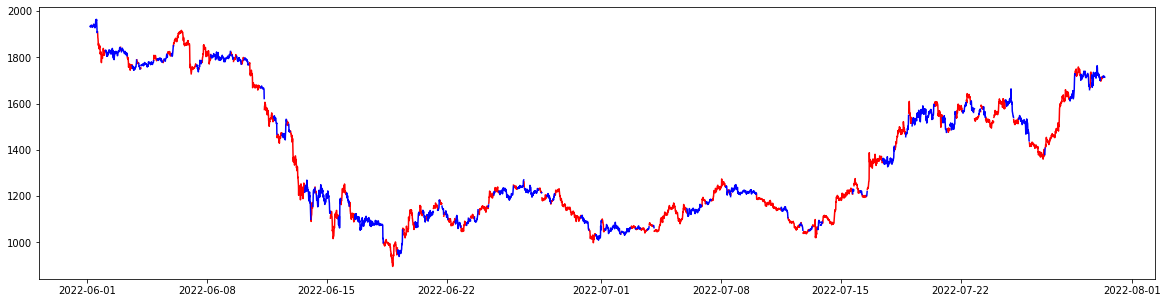

With  ATR


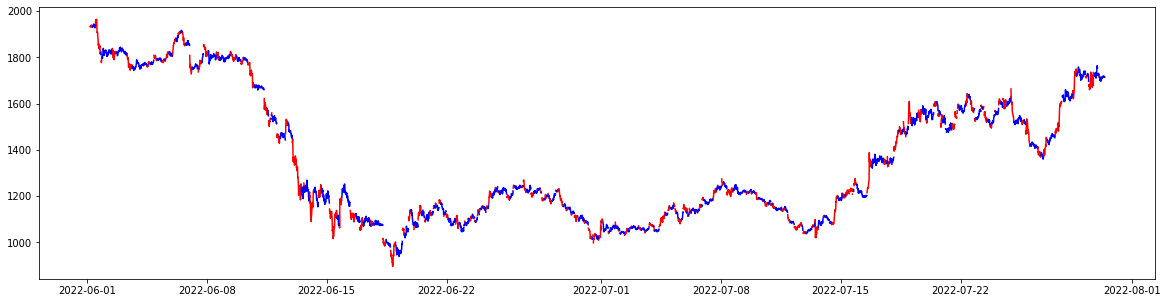

With  RSI


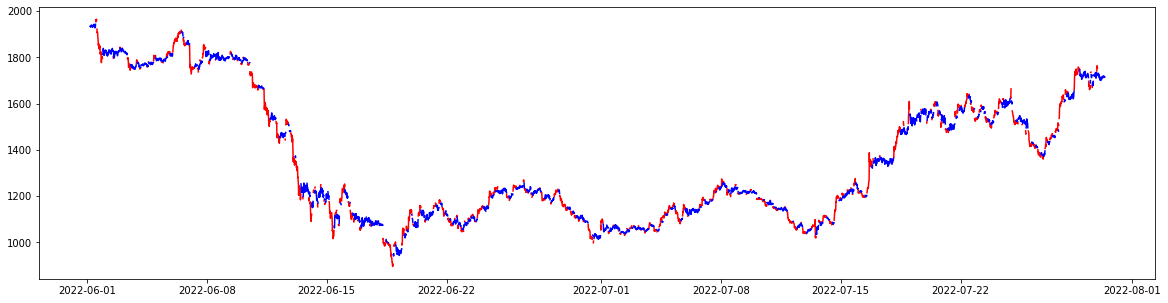

With  BB


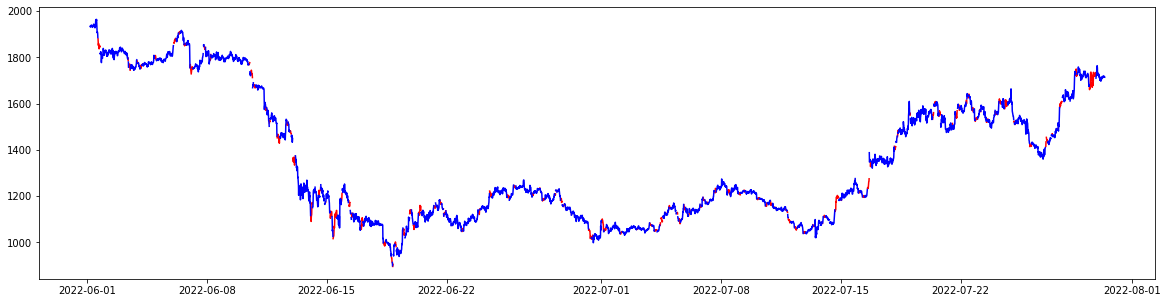

With  CCI


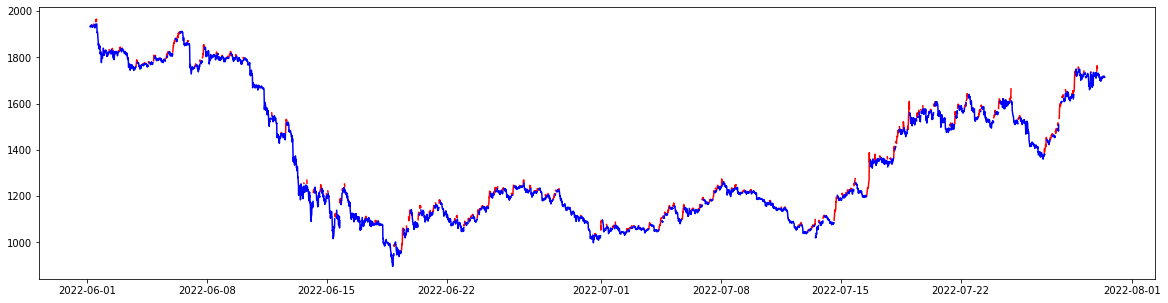

In [60]:
indicators = ['ADX', 'ATR', 'RSI', 'BB', 'CCI']

for indicator in indicators:
    print('With ', indicator)
    get_rangingMarket(get_range(data, indicator), indicator)


Testing w/ more constraining conditions (different combinations of indicators satisfying the ranging market condition)

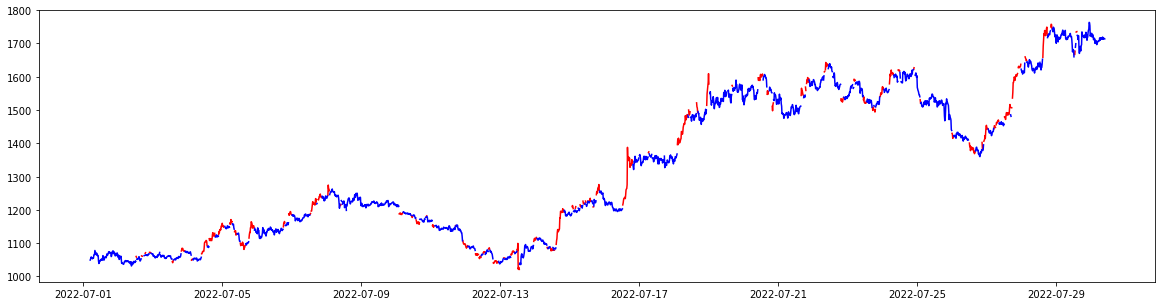

In [61]:
# At least 25 values
df = load_data('07-01-2022')
df_ = load_indicators(df)
df = df_.dropna()
dfTest = df.copy()


indicators = ['ADX', 'ATR', 'RSI', 'CCI']
for indicator in indicators:
    get_range(dfTest, indicator)

dfTest["signal"] = ""
dfTest["signal"] = np.nan

for index, row in dfTest.iterrows():
    if ((dfTest['ADX'][index] == 1 and dfTest['ATR'][index] == 1) or (dfTest['ADX'][index] == 1 and dfTest['RSI'][index] == 1) or (dfTest['CCI'][index] == 1 and dfTest['ADX'][index] == 1) or (dfTest['CCI'][index] == 1 and dfTest['ATR'][index] == 1) or (dfTest['CCI'][index] == 1 and dfTest['RSI'][index] == 1) or (dfTest['ATR'][index] == 1 and dfTest['RSI'][index] == 1)):
        dfTest['signal'][index] = 1
    else:
        dfTest['signal'][index] = 0

indicator = 'signal'
get_rangingMarket(dfTest, indicator)


Testing w/ all indicators satisfying the ranging market condition

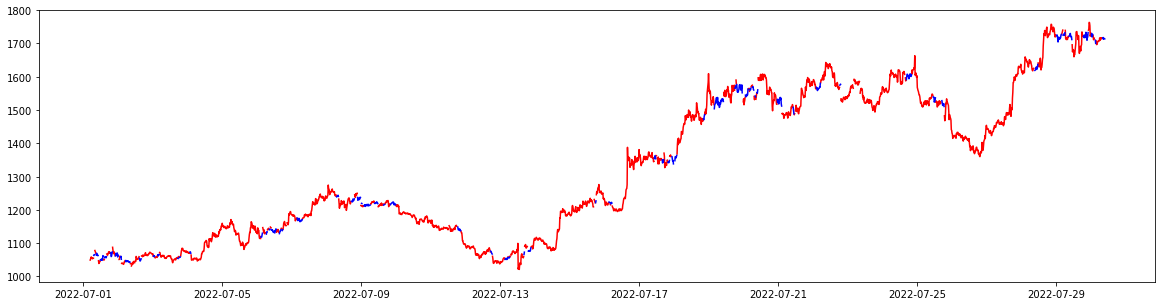

In [62]:
df = load_data('07-01-2022')
df_ = load_indicators(df)
df = df_.dropna()
dfTest = df.copy()


indicators = ['ADX', 'ATR', 'RSI', 'CCI']
for indicator in indicators:
    get_range(dfTest, indicator)

dfTest["signal"] = ""
dfTest["signal"] = np.nan

for index, row in dfTest.iterrows():
    if (dfTest['ADX'][index] == 1 and dfTest['ATR'][index] == 1 and dfTest['RSI'][index] == 1 and dfTest['CCI'][index] == 1):
        dfTest['signal'][index] = 1
    else:
        dfTest['signal'][index] = 0

indicator = 'signal'
get_rangingMarket(dfTest, indicator)
